# Generate Causality Data

In [2]:
import numpy as np
import pandas as pd

In [5]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [23]:
LEN = 1000
N_GARBAGE = 3
NOISE_LEVEL = 1e-3

a_0 = np.random.rand(LEN)
a_1 = np.sin(a_0**2) + np.random.rand(LEN) * NOISE_LEVEL

b_0 = np.random.rand(LEN)
b_1 = np.sin(b_0**2) + np.random.rand(LEN) * NOISE_LEVEL

outcome = np.cos(a_1 + b_1) + np.random.rand(LEN) * NOISE_LEVEL
garbage = {f'garbage_{i}': np.random.random(LEN) for i in range(N_GARBAGE)}
df = pd.DataFrame(
    {
        'a_0': a_0,
        'a_1': a_1,
        'b_0': b_0,
        'b_1': b_1,
        'outcome': outcome,
        **garbage
    }
)
df

,a_0,a_1,b_0,b_1,outcome,garbage_0,garbage_1,garbage_2
0,0.143719,0.020890,0.949859,0.785011,0.693366,0.186459,0.030522,0.206133
1,0.912871,0.740459,0.393493,0.155129,0.625118,0.950961,0.601879,0.171751
2,0.788071,0.582157,0.776890,0.568273,0.408822,0.016179,0.397291,0.581489
3,0.845036,0.655786,0.216194,0.046766,0.764059,0.494600,0.188793,0.576459
4,0.170286,0.029604,0.145250,0.022017,0.998933,0.902298,0.086336,0.878182
...,...,...,...,...,...,...,...,...
995,0.534225,0.281824,0.063743,0.004207,0.960007,0.175856,0.258854,0.011002
996,0.839448,0.648655,0.817336,0.619886,0.298385,0.175587,0.209272,0.287745
997,0.220087,0.048742,0.901316,0.726266,0.714591,0.115533,0.841144,0.899869
998,0.301661,0.091157,0.439417,0.192731,0.960405,0.152614,0.756513,0.123646


  0%|          | 0/8 [00:00<?, ?it/s]

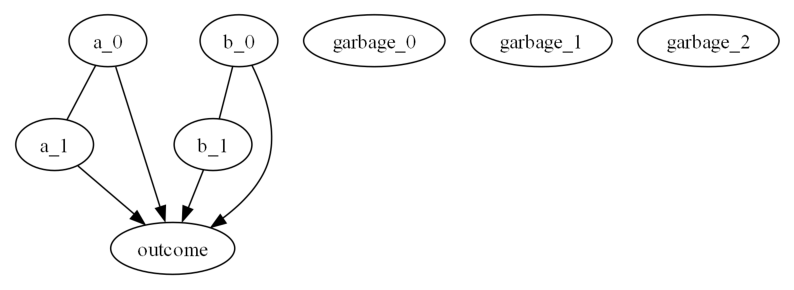

In [24]:
data = df.values  # Convert DataFrame to NumPy array
cg = pc(data, alpha=0.05, indep_test=fisherz)  # Specify alpha and independence test

pdy = GraphUtils.to_pydot(cg.G, labels=df.columns.to_list())
pdy.write_png('causal_graph.png')

img = mpimg.imread('causal_graph.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()